In [41]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import glob
from scipy.spatial import ConvexHull
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import os
from sklearn.preprocessing import StandardScaler
from dtw import dtw

In [42]:
import pandas as pd
import glob

# set paths to folders containing CSV files
path = "C:/DSGP/Data_Challenge_PHM2022_training_data/Data_Challenge_PHM2022_training_data/"

# combine data_po files into df1
files_po = glob.glob(path + "*data_po*.csv")
df1 = pd.DataFrame()
for file in files_po:
    with open(file, 'r') as f:
        csv_string = f.read()

        data = csv_string
        df = pd.DataFrame([x.split(',') for x in data.split('\n')])
        df.drop(df.tail(1).index,inplace=True)

        temp_df = df.iloc[:, :500]
        df1 = pd.concat([df1, temp_df], axis=0)

# rename the columns in df1 and convert to float
df1.columns = [i for i in range(df1.shape[1])]
df1 = df1.rename(columns={0: 'Fault'})
df1 = df1.astype(float)

# combine data_pdmp files into df2
files_pdmp = glob.glob(path + "*data_pdmp*.csv")
df2 = pd.DataFrame()
for file in files_pdmp:
    with open(file, 'r') as f:

        csv_string = f.read()

        data = csv_string
        df = pd.DataFrame([x.split(',') for x in data.split('\n')])
        df.drop(df.tail(1).index,inplace=True)

        temp_df = df.iloc[:, :500]
        df2 = pd.concat([df2, temp_df], axis=0)

# rename the columns in df2 and convert to float
df2.columns = [i for i in range(df2.shape[1])]
df2 = df2.rename(columns={0: 'Fault'})
df2 = df2.astype(float)

# combine data_pin files into df3
files_pin = glob.glob(path + "*data_pin*.csv")
df3 = pd.DataFrame()
for file in files_pin:
    with open(file, 'r') as f:

        csv_string = f.read()

        data = csv_string
        df = pd.DataFrame([x.split(',') for x in data.split('\n')])
        df.drop(df.tail(1).index,inplace=True)

        temp_df = df.iloc[:, :500]
        df3 = pd.concat([df3, temp_df], axis=0)

# rename the columns in df3 and convert to float
df3.columns = [i for i in range(df3.shape[1])]
df3 = df3.rename(columns={0: 'Fault'})
df3 = df3.astype(float)


In [43]:
# reset indexes as upon concating , destroys indexes

df1.set_index(1, inplace=True)
df1.reset_index(inplace=True)

df2.set_index(1, inplace=True)
df2.reset_index(inplace=True)

df3.set_index(1, inplace=True)
df3.reset_index(inplace=True)

C:\Users\rouna\AppData\Local\Temp\ipykernel_25748\1386833471.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1.reset_index(inplace=True)
C:\Users\rouna\AppData\Local\Temp\ipykernel_25748\1386833471.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2.reset_index(inplace=True)
C:\Users\rouna\AppData\Local\Temp\ipykernel_25748\1386833471.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at o

In [44]:
# Assign Fault labels (true values) to new df y_true

y_true1 = df1["Fault"]
y_true2 = df2["Fault"]
y_true3 = df3["Fault"]

In [45]:
# del fault label column to get unlabelled df1, df2, df3

df1.columns = df1.columns.astype(str)
df1_un = df1.drop(["Fault"], axis=1)

df2.columns = df2.columns.astype(str)
df2_un = df2.drop(["Fault"], axis=1)

df3.columns = df3.columns.astype(str)
df3_un = df3.drop(["Fault"], axis=1)

# df1_un ... are unlabelled dfs

In [85]:
df1

,1,Fault,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,-0.027094,2.0,-0.108993,-0.215638,-0.360907,-0.516623,-0.654153,-0.714407,-0.755292,-0.807181,...,0.876335,0.873614,0.893118,0.905145,0.910435,0.919593,0.923374,0.907274,0.876595,0.844927
1,0.353853,1.0,0.313852,0.255584,0.172100,0.053284,-0.101908,-0.303493,-0.537190,-0.780311,...,1.416115,1.441490,1.483615,1.517822,1.502290,1.458545,1.413605,1.367353,1.309825,1.264208
2,0.233543,1.0,0.150550,0.024793,-0.144918,-0.364626,-0.608451,-0.857128,-1.012316,-1.039804,...,1.503797,1.510663,1.471791,1.424976,1.379055,1.319612,1.264883,1.217053,1.195519,1.216501
3,-0.458026,11.0,-0.674171,-0.886389,-1.005027,-1.013721,-0.950306,-0.928938,-0.895080,-0.891321,...,1.304302,1.271592,1.222691,1.176880,1.137141,1.126547,1.116738,1.086340,1.041245,1.012434
4,-0.603502,5.0,-0.823175,-0.964474,-1.000894,-0.950213,-0.913987,-0.883270,-0.846544,-0.889807,...,1.178306,1.160388,1.113702,1.081190,1.062156,1.046056,1.023388,0.994379,0.958910,0.929637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34040,0.195727,5.0,0.088783,-0.049653,-0.238332,-0.446608,-0.626191,-0.717616,-0.721617,-0.712078,...,1.212846,1.204442,1.201804,1.202561,1.212391,1.231204,1.263239,1.295051,1.321879,1.326377
34041,0.153560,8.0,0.041693,-0.083022,-0.201087,-0.259712,-0.303556,-0.367456,-0.396483,-0.446108,...,1.295227,1.301600,1.289891,1.261412,1.240832,1.254100,1.266718,1.268293,1.247355,1.224581
34042,-0.063515,2.0,-0.143260,-0.229028,-0.348366,-0.481000,-0.608688,-0.664606,-0.698920,-0.754461,...,0.723061,0.698304,0.703167,0.711928,0.703591,0.698781,0.705557,0.708152,0.693884,0.669843
34043,0.289514,3.0,0.204368,0.097883,-0.028614,-0.174562,-0.347500,-0.554140,-0.747686,-0.887557,...,1.195614,1.246531,1.278526,1.296627,1.300989,1.303266,1.294292,1.277865,1.289012,1.306875


In [166]:
df1_un1 = df1_un.iloc[:30000, :500]
df1_un1

,1,2,3,4,5,6,7,8,9,10,...,490,491,492,493,494,495,496,497,498,499
0,-0.027094,-0.108993,-0.215638,-0.360907,-0.516623,-0.654153,-0.714407,-0.755292,-0.807181,-0.842450,...,0.876335,0.873614,0.893118,0.905145,0.910435,0.919593,0.923374,0.907274,0.876595,0.844927
1,0.353853,0.313852,0.255584,0.172100,0.053284,-0.101908,-0.303493,-0.537190,-0.780311,-0.966859,...,1.416115,1.441490,1.483615,1.517822,1.502290,1.458545,1.413605,1.367353,1.309825,1.264208
2,0.233543,0.150550,0.024793,-0.144918,-0.364626,-0.608451,-0.857128,-1.012316,-1.039804,-0.970473,...,1.503797,1.510663,1.471791,1.424976,1.379055,1.319612,1.264883,1.217053,1.195519,1.216501
3,-0.458026,-0.674171,-0.886389,-1.005027,-1.013721,-0.950306,-0.928938,-0.895080,-0.891321,-0.897980,...,1.304302,1.271592,1.222691,1.176880,1.137141,1.126547,1.116738,1.086340,1.041245,1.012434
4,-0.603502,-0.823175,-0.964474,-1.000894,-0.950213,-0.913987,-0.883270,-0.846544,-0.889807,-0.930974,...,1.178306,1.160388,1.113702,1.081190,1.062156,1.046056,1.023388,0.994379,0.958910,0.929637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.305961,0.257413,0.189995,0.082554,-0.058991,-0.250653,-0.445095,-0.607347,-0.681238,-0.683987,...,1.077752,1.119687,1.154478,1.166196,1.162740,1.171200,1.193227,1.209808,1.225441,1.256143
29996,0.291145,0.213383,0.100910,-0.022052,-0.132234,-0.183324,-0.202798,-0.266990,-0.322227,-0.361638,...,1.304597,1.290470,1.280514,1.258048,1.224025,1.223100,1.252722,1.280636,1.275827,1.251866
29997,0.064267,-0.052632,-0.168051,-0.242096,-0.276868,-0.331873,-0.377759,-0.404754,-0.500740,-0.619218,...,1.292994,1.280568,1.257016,1.240624,1.239747,1.264953,1.280950,1.268450,1.241178,1.225600
29998,0.321925,0.239777,0.137579,0.003378,-0.156569,-0.342561,-0.528737,-0.691023,-0.776361,-0.767529,...,1.158964,1.225249,1.249087,1.257717,1.252488,1.236632,1.228689,1.221667,1.216919,1.244153


In [167]:
y_true11 = y_true1[:30000]
y_true11

0         2.0
1         1.0
2         1.0
3        11.0
4         5.0
         ... 
29995     5.0
29996     8.0
29997     8.0
29998    10.0
29999     1.0
Name: Fault, Length: 30000, dtype: float64

In [125]:
import numpy as np
import pandas as pd
import pywt

# Define a function to identify wave patterns in a given row
def identify_wave(row):
    # Apply discrete wavelet transform (DWT) using the 'db4' wavelet
    coeffs = pywt.dwt(row, 'db4')
    
    # Extract the approximation coefficients (cA) from the DWT result
    cA, _ = coeffs
    
    # Compute the standard deviation of the cA values
    std = np.std(cA)
    
    return std

# Apply the wave identification function to each row of the dataframe
wavelets = df1_un1.apply(identify_wave, axis=1)

# Use k-means clustering to cluster the rows based on their wavelet coefficients
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=11, random_state=0).fit(wavelets.values.reshape(-1, 1))

# Assign a cluster label to each row in a new column in the dataframe
df1_un1['cluster'] = kmeans.labels_


c:\Python\Python 3.9.13\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


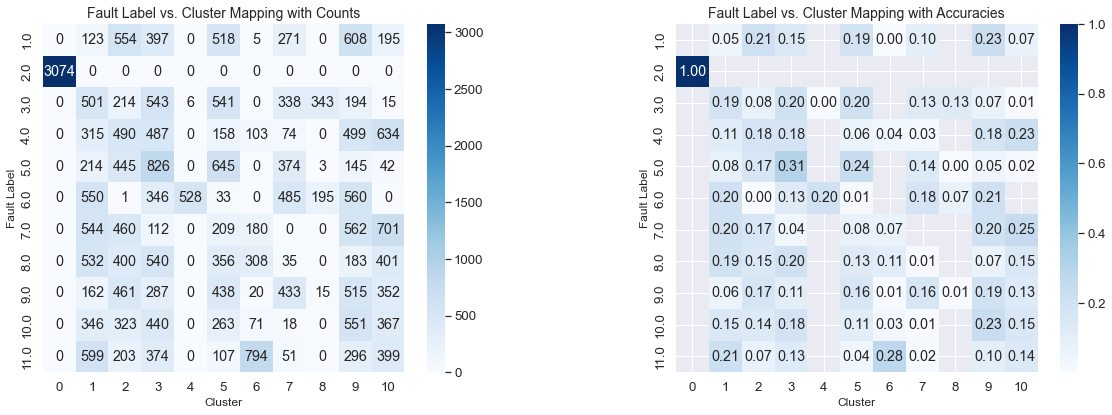

In [126]:
# create a crosstab of true labels and cluster assignments
label_cluster_map = pd.crosstab(y_true11, df1_un1["cluster"])

# calculate the accuracy of each group
grouped = df1_un1.groupby([y_true11, df1_un1["cluster"]])
accuracy = grouped.size() / grouped.size().groupby(level=0).sum()

# create the figure and axes for the subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# plot the heatmap with counts on the left subplot
sns.set(font_scale=1.2)
sns.heatmap(label_cluster_map, cmap='Blues', annot=True, fmt='d', ax=axs[0])
axs[0].set_xlabel('Cluster', fontsize=12)
axs[0].set_ylabel('Fault Label', fontsize=12)
axs[0].set_title('Fault Label vs. Cluster Mapping with Counts', fontsize=14)

# plot the heatmap with accuracies on the right subplot
sns.heatmap(accuracy.unstack(), cmap='Blues', annot=True, fmt='.2f', ax=axs[1])
axs[1].set_xlabel('Cluster', fontsize=12)
axs[1].set_ylabel('Fault Label', fontsize=12)
axs[1].set_title('Fault Label vs. Cluster Mapping with Accuracies', fontsize=14)

# adjust the layout and spacing of the subplots
plt.tight_layout()
plt.subplots_adjust(wspace=0.4)

# display the subplots
plt.show()


In [133]:
import numpy as np
import pandas as pd
import pywt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Define a function to identify wave patterns in a given row
def identify_wave_shift(row, wavelet='sym4', level=5):
    # Apply discrete wavelet transform (DWT) using the specified wavelet and level
    coeffs = pywt.wavedec(row, wavelet, level=level)
    
    # Extract the approximation coefficients (cA) from the DWT result
    cA = coeffs[0]
    
    # Find the location of the maximum value in cA
    max_loc = np.argmax(cA)
    
    # Compute the shift as the difference between the maximum location and the midpoint of cA
    shift = max_loc - len(cA) // 2
    
    return shift

# Apply the wave identification function to each row of the dataframe
shifts = df1_un1.apply(lambda x: identify_wave_shift(x, wavelet='sym4', level=5), axis=1)

# Drop any rows with duplicate values in the "shift" column
shifts = shifts.drop_duplicates()

# Scale the data before clustering
scaler = StandardScaler()
shifts_scaled = scaler.fit_transform(shifts.values.reshape(-1, 1))

# Use k-means clustering to cluster the rows based on their wavelet coefficients
kmeans = KMeans(n_clusters=11, random_state=0).fit(shifts_scaled)

# Assign a cluster label to each row in a new column in the dataframe
df1_un1['cluster'] = np.nan
df1_un1.loc[shifts.index, 'cluster'] = kmeans.labels_


c:\Python\Python 3.9.13\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [135]:
df1_un1

,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,cluster
0,-0.027094,-0.108993,-0.215638,-0.360907,-0.516623,-0.654153,-0.714407,-0.755292,-0.807181,-0.842450,...,0.873614,0.893118,0.905145,0.910435,0.919593,0.923374,0.907274,0.876595,0.844927,7.0
1,0.353853,0.313852,0.255584,0.172100,0.053284,-0.101908,-0.303493,-0.537190,-0.780311,-0.966859,...,1.441490,1.483615,1.517822,1.502290,1.458545,1.413605,1.367353,1.309825,1.264208,8.0
2,0.233543,0.150550,0.024793,-0.144918,-0.364626,-0.608451,-0.857128,-1.012316,-1.039804,-0.970473,...,1.510663,1.471791,1.424976,1.379055,1.319612,1.264883,1.217053,1.195519,1.216501,2.0
3,-0.458026,-0.674171,-0.886389,-1.005027,-1.013721,-0.950306,-0.928938,-0.895080,-0.891321,-0.897980,...,1.271592,1.222691,1.176880,1.137141,1.126547,1.116738,1.086340,1.041245,1.012434,1.0
4,-0.603502,-0.823175,-0.964474,-1.000894,-0.950213,-0.913987,-0.883270,-0.846544,-0.889807,-0.930974,...,1.160388,1.113702,1.081190,1.062156,1.046056,1.023388,0.994379,0.958910,0.929637,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.305961,0.257413,0.189995,0.082554,-0.058991,-0.250653,-0.445095,-0.607347,-0.681238,-0.683987,...,1.119687,1.154478,1.166196,1.162740,1.171200,1.193227,1.209808,1.225441,1.256143,NaN
29996,0.291145,0.213383,0.100910,-0.022052,-0.132234,-0.183324,-0.202798,-0.266990,-0.322227,-0.361638,...,1.290470,1.280514,1.258048,1.224025,1.223100,1.252722,1.280636,1.275827,1.251866,NaN
29997,0.064267,-0.052632,-0.168051,-0.242096,-0.276868,-0.331873,-0.377759,-0.404754,-0.500740,-0.619218,...,1.280568,1.257016,1.240624,1.239747,1.264953,1.280950,1.268450,1.241178,1.225600,NaN
29998,0.321925,0.239777,0.137579,0.003378,-0.156569,-0.342561,-0.528737,-0.691023,-0.776361,-0.767529,...,1.225249,1.249087,1.257717,1.252488,1.236632,1.228689,1.221667,1.216919,1.244153,NaN


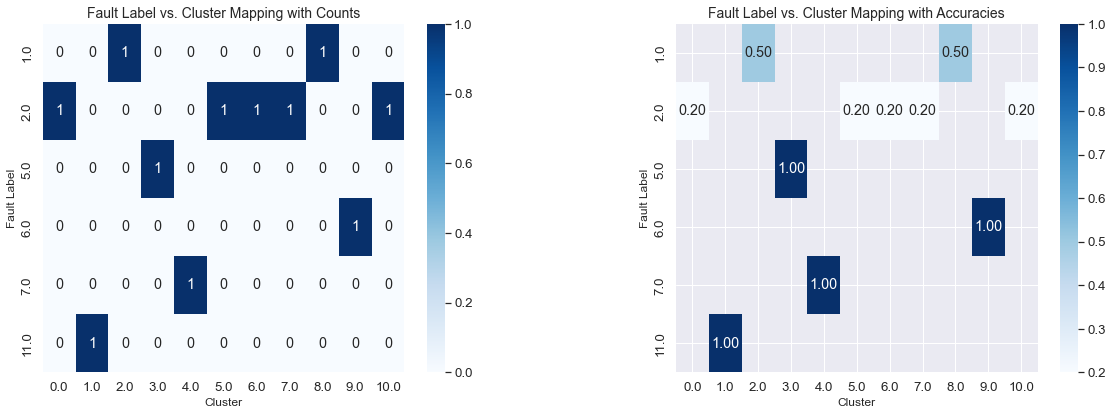

In [134]:
# create a crosstab of true labels and cluster assignments
label_cluster_map = pd.crosstab(y_true11, df1_un1["cluster"])

# calculate the accuracy of each group
grouped = df1_un1.groupby([y_true11, df1_un1["cluster"]])
accuracy = grouped.size() / grouped.size().groupby(level=0).sum()

# create the figure and axes for the subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# plot the heatmap with counts on the left subplot
sns.set(font_scale=1.2)
sns.heatmap(label_cluster_map, cmap='Blues', annot=True, fmt='d', ax=axs[0])
axs[0].set_xlabel('Cluster', fontsize=12)
axs[0].set_ylabel('Fault Label', fontsize=12)
axs[0].set_title('Fault Label vs. Cluster Mapping with Counts', fontsize=14)

# plot the heatmap with accuracies on the right subplot
sns.heatmap(accuracy.unstack(), cmap='Blues', annot=True, fmt='.2f', ax=axs[1])
axs[1].set_xlabel('Cluster', fontsize=12)
axs[1].set_ylabel('Fault Label', fontsize=12)
axs[1].set_title('Fault Label vs. Cluster Mapping with Accuracies', fontsize=14)

# adjust the layout and spacing of the subplots
plt.tight_layout()
plt.subplots_adjust(wspace=0.4)

# display the subplots
plt.show()


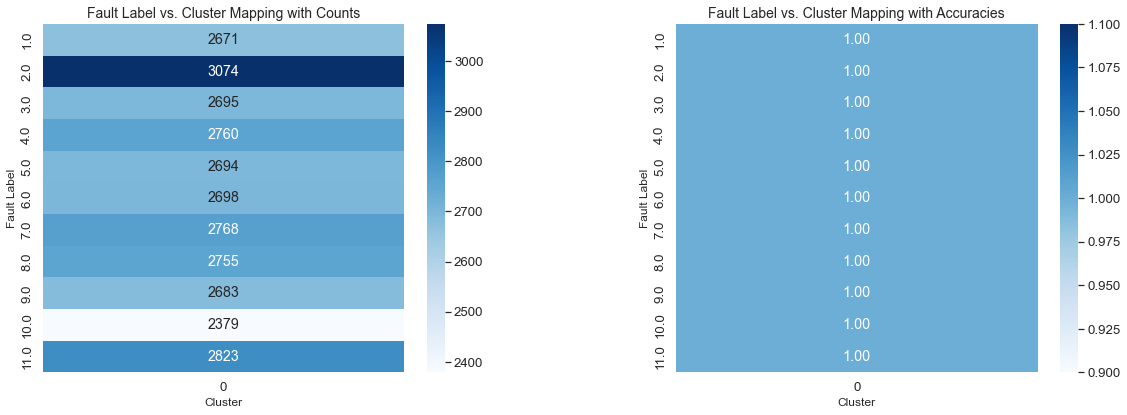

In [165]:
# create a crosstab of true labels and cluster assignments
label_cluster_map = pd.crosstab(y_true11, df1_un1["cluster"])

# calculate the accuracy of each group
grouped = df1_un1.groupby([y_true11, df1_un1["cluster"]])
accuracy = grouped.size() / grouped.size().groupby(level=0).sum()

# create the figure and axes for the subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# plot the heatmap with counts on the left subplot
sns.set(font_scale=1.2)
sns.heatmap(label_cluster_map, cmap='Blues', annot=True, fmt='d', ax=axs[0])
axs[0].set_xlabel('Cluster', fontsize=12)
axs[0].set_ylabel('Fault Label', fontsize=12)
axs[0].set_title('Fault Label vs. Cluster Mapping with Counts', fontsize=14)

# plot the heatmap with accuracies on the right subplot
sns.heatmap(accuracy.unstack(), cmap='Blues', annot=True, fmt='.2f', ax=axs[1])
axs[1].set_xlabel('Cluster', fontsize=12)
axs[1].set_ylabel('Fault Label', fontsize=12)
axs[1].set_title('Fault Label vs. Cluster Mapping with Accuracies', fontsize=14)

# adjust the layout and spacing of the subplots
plt.tight_layout()
plt.subplots_adjust(wspace=0.4)

# display the subplots
plt.show()
